# Assignment 1
Vladislav Trukhin

## Problem 1

### 1.a

In [1]:
import numpy as np
from skimage import io
from skimage import color
from scipy import ndimage
from time import time

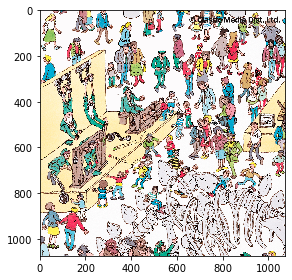

In [2]:
image = io.imread("waldo.png")
io.imshow(image)

In [3]:
def convolve(image, filter):
    # Swap from convolution filter to correlation filter
    filter = filter[::-1, ::-1]

    # Convert image and make copy
    image = color.rgb2gray(image)
    image_new = image.copy()

    # Parameters
    k_half = int(np.shape(filter)[1]/2)
    xmax, ymax = np.shape(image_new)

    # Iterate and apply filter
    image = np.pad(image, k_half)
    for i in range(xmax):
        for j in range(ymax):
            image_new[i, j] = np.sum(np.multiply(image[i:i+2*k_half+1, j:j+2*k_half+1], filter))
    
    return image_new

/Users/vladislavtrukhin/opt/anaconda3/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Lossy conversion from float64 to uint8. Range [0.0019187745098039216, 1.75]. Convert image to uint8 prior to saving to suppress this warning.


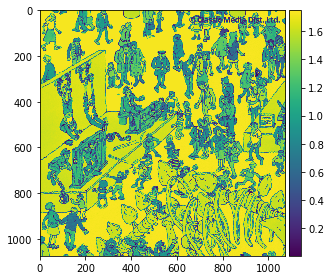

In [4]:
filter = np.matrix([[0, 0.125, 0], [0.5, 0.5, 0.125], [0, 0.5, 0]])

convolved_image = convolve(image, filter)
io.imshow(convolved_image)
io.imsave("q1a.png", convolved_image)

### 1.b

In [5]:
def separate(filter):
    # Separate
    u, s, vh = np.linalg.svd(filter)
    v_filter = u.T[0] * np.sqrt(s[0])
    h_filter = vh[0] * np.sqrt(s[0])

    return np.allclose(filter, v_filter.T * h_filter), v_filter, h_filter

In [6]:
separable, v, h = separate(filter)
print(separable)

False


### 1.c

In [7]:
def convolve_separable(image, filter):
    # Swap from convolution filter to correlation filter
    filter = filter[::-1, ::-1]

    # Separate
    separable, v, h = separate(filter)

    # If not separable, do regular convolve
    if not separable:
        return convolve(image, filter[::-1, ::-1])

    # Convert image and make two copies
    image = color.rgb2gray(image)
    image_inter = image.copy()
    image_new = image.copy()

    # Parameters
    k_half = int(np.shape(filter)[1]/2)
    xmax, ymax = np.shape(image_new)
    
    # Iterate and apply vertical filter
    image = np.pad(image, k_half)
    for i in range(xmax):
        for j in range(ymax): 
            image_inter[i, j] = image[i:i+2*k_half+1, j+k_half] @ v.T

    # Iterate and apply horizontal filter
    image_inter = np.pad(image_inter, k_half)
    for i in range(xmax):
        for j in range(ymax): 
            image_new[i, j] = image_inter[i+k_half, j:j+2*k_half+1] @ h.T

    return image_new

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Time taken is  7.448953151702881


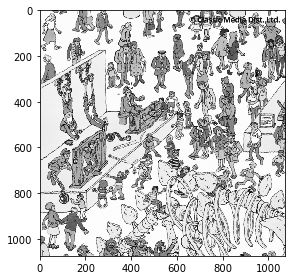

In [8]:
gaussian_filter = 1/16 * np.matrix([[1, 2, 1], [2, 4, 2], [1, 2, 1]])

t0 = time()
convolved_image = convolve_separable(image, gaussian_filter)
io.imshow(convolved_image)
t1 = time()
print("Time taken is ", t1-t0)
io.imsave("q1c.png", convolved_image)

Time taken is  10.121655225753784


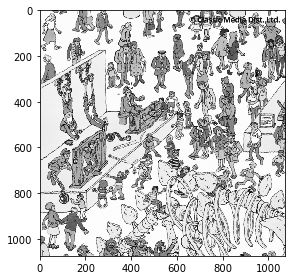

In [9]:
t0 = time()
io.imshow(convolve(image, gaussian_filter))
t1 = time()
print("Time taken is ", t1-t0)

### 1.d

In [10]:
def correlate_separable(image, filter):
    # Separate
    separable, v, h = separate(filter)

    # If not separable, do regular correlate
    if not separable:
        return correlate(image, filter)

    # Convert image and make two copies
    image = color.rgb2gray(image)
    image_inter = image.copy()
    image_new = image.copy()

    # Parameters
    k_half = int(np.shape(filter)[1]/2)
    xmax, ymax = np.shape(image_new)
    
    # Iterate and apply vertical filter
    image = np.pad(image, k_half)
    for i in range(xmax):
        for j in range(ymax): 
            image_inter[i, j] = image[i:i+2*k_half+1, j+k_half] @ v.T

    # Iterate and apply horizontal filter
    image_inter = np.pad(image_inter, k_half)
    for i in range(xmax):
        for j in range(ymax): 
            image_new[i, j] = image_inter[i+k_half, j:j+2*k_half+1] @ h.T

    return image_new
    
def correlate(image, filter):
    # Convert image and make copy
    image = color.rgb2gray(image)
    image_new = image.copy()

    # Parameters
    k_half = int(np.shape(filter)[1]/2)
    xmax, ymax = np.shape(image_new)

    # Iterate and apply filter
    image = np.pad(image, k_half)
    for i in range(xmax):
        for j in range(ymax):
            image_new[i, j] = np.sum(np.multiply(image[i:i+2*k_half+1, j:j+2*k_half+1], filter))
    
    return image_new

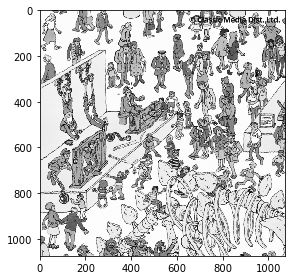

In [11]:
io.imshow(correlate_separable(image, gaussian_filter))

Lossy conversion from float64 to uint8. Range [0.002438627450980392, 1.75]. Convert image to uint8 prior to saving to suppress this warning.


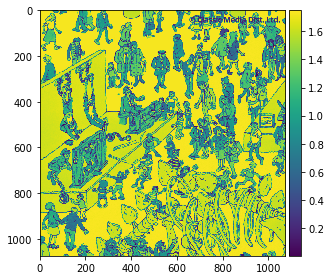

In [12]:
correlated_image = correlate(image, filter)
io.imshow(correlated_image)
io.imsave("q1d.png", correlated_image)

## Problem 2

In [13]:
def generate_gaussian(k, sigma):
    filter = np.zeros((k, k), dtype=np.float64)
    for i in range(k):
        for j in range(k):
            # Distance from center of matrix
            x = np.abs(int(k/2)-i)
            y = np.abs(int(k/2)-j)
            # Gaussian formula
            filter[i, j] = 1/(2*np.pi*sigma**2)*np.exp((-1/(2*sigma**2))*(x**2+y**2))
    # Normalize
    return filter/np.sum(filter)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


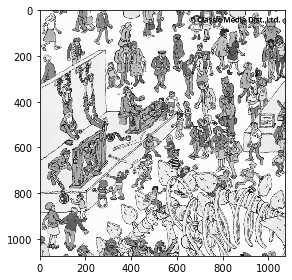

In [14]:
convolved_image = convolve_separable(image, generate_gaussian(3, 1))
io.imshow(convolved_image)
io.imsave("q2.png", convolved_image)

## Problem 3

### 3.a

In [15]:
def grad_magnitude(image):
    image = color.rgb2gray(image)
    df = ndimage.convolve1d(image, np.array([-1, 1]), axis=0), ndimage.convolve1d(image, np.array([-1, 1]), axis=1)
    return np.sqrt(np.square(df[0])+np.square(df[1]))

def grad_orientation(image):
    image = color.rgb2gray(image)
    df = ndimage.convolve1d(image, np.array([-1, 1]), axis=0), ndimage.convolve1d(image, np.array([-1, 1]), axis=1)
    return np.arctan(df[1]/df[0])

Lossy conversion from float64 to uint8. Range [0.0, 1.3298457852599974]. Convert image to uint8 prior to saving to suppress this warning.


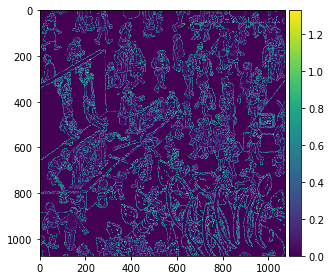

In [16]:
image_grad = grad_magnitude(image)
io.imshow(image_grad)
io.imsave("q3a1.png", image_grad)

/var/folders/pc/0kwjmp2j1_sgm8fzrls2x5m80000gn/T/ipykernel_27351/3046963559.py:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image = color.rgb2gray(image)
Lossy conversion from float64 to uint8. Range [0.0, 1.1771437143768653]. Convert image to uint8 prior to saving to suppress this warning.


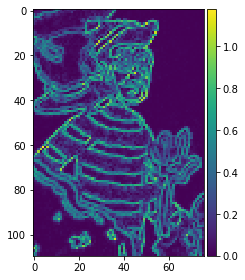

In [17]:
template = io.imread("template.png")

template_grad = grad_magnitude(template)
io.imshow(template_grad)
io.imsave("q3a2.png", template_grad)

### 3.b

In [24]:
def localize(image, template):
    # Get gradients
    image_grad_mag = grad_magnitude(image)
    template_grad_mag = grad_magnitude(template)
    
    # Correlate on gradients and find point where the template most correlates with image
    result = ndimage.correlate(image_grad_mag, template_grad_mag)
    x, y = np.where(result == result.max())
    
    # Make copy
    new_image = image.copy()
    xmax, ymax, zmax = np.shape(template)
    
    # Draw box of template origin
    for i in range(int(xmax/2)):
        for j in range(int(ymax/2)):
            new_image[x+i,y+j,] = 0
            new_image[x+i,y-j,] = 0
            new_image[x-i,y+j,] = 0
            new_image[x-i,y-j,] = 0
    return new_image

/var/folders/pc/0kwjmp2j1_sgm8fzrls2x5m80000gn/T/ipykernel_27351/3046963559.py:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image = color.rgb2gray(image)


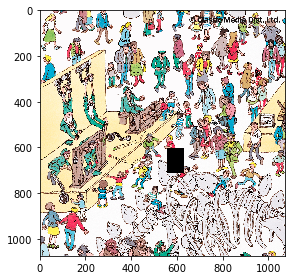

In [25]:
localized_template = localize(image, template)
io.imshow(localized_template)
io.imsave("q3b.png", localized_template)

## Problem 4

In [20]:
def canny_edge_detect(image, threshold, k, sigma):
    # Filter image over gaussian
    fh = convolve_separable(image, generate_gaussian(k, sigma))
    
    # Get gradient and orientation
    grad_mag = grad_magnitude(fh)
    grad_or = grad_orientation(fh)
    
    # Make copy
    g = fh.copy()
    
    # Iterate and apply canny edge algorithm
    xmax, ymax = np.shape(fh)
    for i in range(xmax):
        for j in range(ymax):
            # Set as black
            g[i, j] = 0
            # If above threshold continue
            if grad_mag[i, j] >= threshold:
                # Find closest standard angle to the gradient orientation
                angles = np.abs(np.array([np.pi/2,np.pi/4,0,-np.pi/4,-np.pi/2]) - grad_or[i, j])
                closest_angle = np.argmin(angles)
                n1 = i, j
                n2 = i, j
                # Use the closest standard angle to get 2 neighbours approximately along the gradient
                if closest_angle == 1:
                    if i+1 in range(xmax) and j+1 in range(ymax):
                        n1 = i+1, j+1
                    if i-1 in range(xmax) and j-1 in range(ymax):
                        n2 = i-1, j-1
                elif closest_angle == 2:
                    if i+1 in range(xmax):
                        n1 = i+1, j
                    if i-1 in range(xmax):
                        n2 = i-1, j
                elif closest_angle == 3:
                    if i-1 in range(xmax) and j+1 in range(ymax):
                        n1 = i-1, j+1
                    if i+1 in range(xmax) and j-1 in range(ymax):
                        n2 = i+1, j-1
                else:
                    if j+1 in range(ymax):
                        n1 = i, j+1
                    if j-1 in range(ymax):
                        n2 = i, j-1
                # If 2 neighbours gradient magnitude both less, set as white
                if grad_mag[i, j] >= grad_mag[n1] and grad_mag[i, j] >= grad_mag[n2]:
                    g[i, j] = 1
    return g

/var/folders/pc/0kwjmp2j1_sgm8fzrls2x5m80000gn/T/ipykernel_27351/3046963559.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image = color.rgb2gray(image)
/var/folders/pc/0kwjmp2j1_sgm8fzrls2x5m80000gn/T/ipykernel_27351/3046963559.py:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image = color.rgb2gray(image)
/var/folders/pc/0kwjmp2j1_sgm8fzrls2x5m80000gn/T/ipykernel_27351/3046963559.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return np.arctan(df[1]/df[0])
/var/folders/pc/0kwjmp2j1_sgm8fzrls2x5m80000gn/T/ipykernel_27351/304

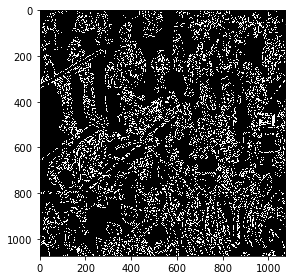

In [21]:
canny_edge_image = canny_edge_detect(image, 0.1, 3, 1)
io.imshow(canny_edge_image)
io.imsave("q4.png", canny_edge_image)